### Load the data

In [151]:
import pandas as pd

df = pd.read_csv("../data_files/ecq_B_200_all_one_per_iso.csv")


### Poke around the data

In [152]:
print(df.head())

        2       3       5       7      11      13      17      19      23  \
0 -0.7071 -0.2887  0.2236 -0.3780  0.1508  0.5547 -0.2425  0.0000 -0.1043   
1 -0.3536 -0.5774  0.0000  0.1890  0.0000 -0.5547  0.7276  0.2294  0.0000   
2 -0.3536 -0.2887  0.2236  0.0000 -0.6030 -0.2774  0.2425  0.4588  0.0000   
3 -0.3536  0.0000 -0.4472  0.7559  0.0000 -0.2774  0.1213 -0.4588  0.4170   
4  0.0000 -0.5774  0.6708 -0.1890  0.4523 -0.5547 -0.3638  0.1147  0.0000   

       29  ...    1171    1181    1187    1193    1201    1213   1217    1223  \
0  0.0000  ... -0.0438 -0.2619 -0.1742 -0.3040  0.0289 -0.5886 -0.602  0.2002   
1 -0.5571  ...  0.2922  0.8730 -0.1742  0.9554  0.2020  0.3733 -0.086 -0.3431   
2 -0.1857  ... -0.1753 -0.4947  0.1742 -0.5501 -0.2020 -0.2584  0.258  0.2288   
3  0.5571  ...  0.4091 -0.4947  0.0000  0.3764 -0.2020 -0.1436  0.946 -0.8007   
4  0.5571  ...  0.8182 -0.2619  0.6966  0.5211  0.0721 -0.6604  0.430  0.6434   

   conductor  rank  
0         11     0  
1       

In [153]:
df['rank'].value_counts()

rank
1    1086046
0     790258
2     279057
3       8899
4          1
Name: count, dtype: int64

In [154]:
df['conductor'].value_counts()

conductor
235200    754
369600    612
475200    592
423360    580
302400    572
         ... 
255594      1
255586      1
255581      1
255579      1
500393      1
Name: count, Length: 295392, dtype: int64

### sample 5000 curves each of rank 0 to 4

In [155]:
df_rank_0 = df.loc[df['rank'] == 0]
df_rank_1 = df.loc[df['rank'] == 1]
df_rank_2 = df.loc[df['rank'] == 2]
df_rank_3 = df.loc[df['rank'] == 3]


In [156]:
df_rank_0 = df_rank_0.sample(n=5000)
df_rank_1 = df_rank_1.sample(n=5000)
df_rank_2 = df_rank_2.sample(n=5000)
df_rank_3 = df_rank_3.sample(n=5000)

In [157]:
df = pd.concat([df_rank_0, df_rank_1, df_rank_2, df_rank_3], axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,2,3,5,7,11,13,17,19,23,29,...,1171,1181,1187,1193,1201,1213,1217,1223,conductor,rank
0,0.0000,0.0000,0.0000,0.0000,0.4523,0.6934,0.7276,0.0000,0.0000,0.6499,...,-0.0584,-0.0291,0.1306,-0.0290,0.5338,-0.0144,0.4300,-0.7721,440100,0
1,0.0000,0.0000,0.2236,0.7559,-0.6030,-0.8321,0.7276,0.9177,0.0000,0.0000,...,-0.6429,0.4947,-0.2612,-0.7817,-0.7791,-0.2584,0.4013,0.9722,172880,0
2,0.0000,-0.2887,0.2236,-0.5669,0.0000,0.2774,0.1213,0.8030,0.1043,-0.5571,...,0.2338,-0.5965,-0.8998,0.1448,0.0866,-0.1436,0.9460,-0.5004,22380,0
3,0.0000,0.2887,0.6708,0.7559,-0.4523,-0.6934,0.3638,0.9177,-0.1043,0.7428,...,-0.4091,0.3928,-0.4644,-0.6659,-0.6060,0.7465,-0.8313,-0.1573,260016,0
4,0.3536,0.8660,0.2236,-0.1890,0.1508,0.2774,-0.2425,-0.1147,0.1043,0.5571,...,-0.3507,0.6984,0.7401,-0.7093,-0.6781,-0.2584,-0.2580,0.2574,78470,0


In [158]:
y = df['rank']
X = df.drop(['conductor', 'rank'], axis=1)
print(y.head(), y.shape)
print(X.head(), X.shape)



0    0
1    0
2    0
3    0
4    0
Name: rank, dtype: int64 (20000,)
        2       3       5       7      11      13      17      19      23  \
0  0.0000  0.0000  0.0000  0.0000  0.4523  0.6934  0.7276  0.0000  0.0000   
1  0.0000  0.0000  0.2236  0.7559 -0.6030 -0.8321  0.7276  0.9177  0.0000   
2  0.0000 -0.2887  0.2236 -0.5669  0.0000  0.2774  0.1213  0.8030  0.1043   
3  0.0000  0.2887  0.6708  0.7559 -0.4523 -0.6934  0.3638  0.9177 -0.1043   
4  0.3536  0.8660  0.2236 -0.1890  0.1508  0.2774 -0.2425 -0.1147  0.1043   

       29  ...    1153    1163    1171    1181    1187    1193    1201  \
0  0.6499  ...  0.2651 -0.5718 -0.0584 -0.0291  0.1306 -0.0290  0.5338   
1  0.0000  ...  0.0589 -0.0586 -0.6429  0.4947 -0.2612 -0.7817 -0.7791   
2 -0.5571  ...  0.4859 -0.1759  0.2338 -0.5965 -0.8998  0.1448  0.0866   
3  0.7428  ...  0.0147  0.4252 -0.4091  0.3928 -0.4644 -0.6659 -0.6060   
4  0.5571  ... -0.0736 -0.4398 -0.3507  0.6984  0.7401 -0.7093 -0.6781   

     1213    1217    12

### Scaling

In [159]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


### PCA plots

In [160]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)



In [161]:
pca_X = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(pca_X.head())


   principal component 1  principal component 2
0               3.268253              -0.322870
1               2.614207              -2.686909
2               2.568398              -0.836746
3               3.302453              -0.939685
4               2.946801               1.505389


In [165]:

pca_df = pd.concat([pca_X, y], axis = 1)
pca_df.head()

,principal component 1,principal component 2,rank
0,3.268253,-0.322870,0
1,2.614207,-2.686909,0
2,2.568398,-0.836746,0
3,3.302453,-0.939685,0
4,2.946801,1.505389,0


In [166]:
# with no conductor (only a_p): array([0.00657999, 0.00612339])
# with conductor array([0.00655257, 0.00609457])
# only a_p and no scaling: array([0.00636217, 0.00599505])


pca.explained_variance_ratio_

array([0.01905026, 0.00627561])

In [167]:
pca_df["rank"].value_counts()

rank
0    5000
1    5000
2    5000
3    5000
Name: count, dtype: int64

In [169]:
#pca_df_partial = pca_df.iloc[:5000]
pca_df_partial = pca_df
pca_df_partial["rank"].value_counts()

rank
0    5000
1    5000
2    5000
3    5000
Name: count, dtype: int64

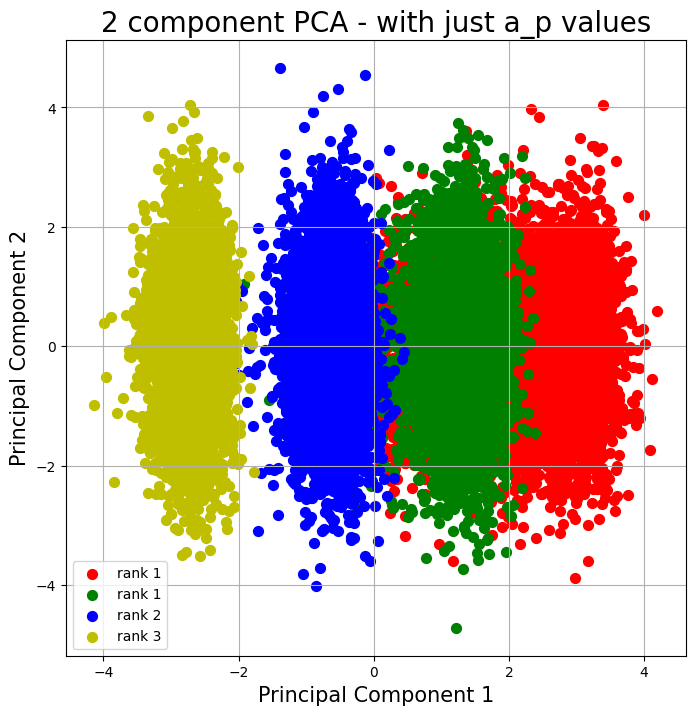

In [178]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - with just a_p values', fontsize = 20)

ranks = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'y']
for rank, color in zip(ranks, colors):
    indicesToKeep = pca_df_partial['rank'] == rank
    ax.scatter(pca_df_partial.loc[indicesToKeep, 'principal component 1']
               , pca_df_partial.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(['rank 1', 'rank 1', 'rank 2', 'rank 3'])
ax.grid()

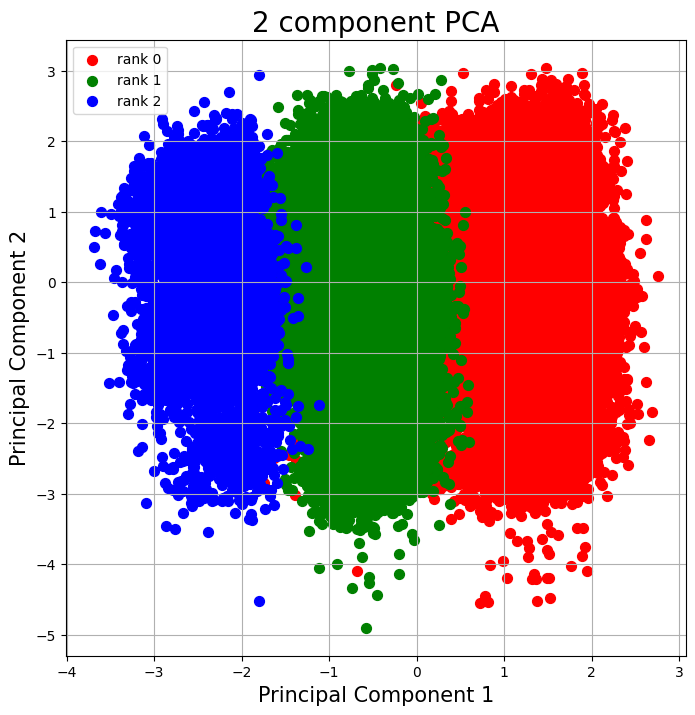

In [82]:
# pca_df_partial = pca_df.iloc[:100000]
# pca_df_partial["rank"].value_counts()

# import matplotlib.pyplot as plt 
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)

# ranks = [0, 1, 2]
# colors = ['r', 'g', 'b']
# for rank, color in zip(ranks, colors):
#     indicesToKeep = pca_df_partial['rank'] == rank
#     ax.scatter(pca_df_partial.loc[indicesToKeep, 'principal component 1']
#                , pca_df_partial.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
    
# ax.legend(['rank 0', 'rank 1', 'rank 2'])
# ax.grid()